In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import scipy
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
#Brief info on rows and columns
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
"""
Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)


"""


"\nAttribute Information:\n\nNumber of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)\n\nAttribute Information:\n0. url: URL of the article (non-predictive)\n1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)\n2. n_tokens_title: Number of words in the title\n3. n_tokens_content: Number of words in the content\n4. n_unique_tokens: Rate of unique words in the content\n5. n_non_stop_words: Rate of non-stop words in the content\n6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content\n7. num_hrefs: Number of links\n8. num_self_hrefs: Number of links to other articles published by Mashable\n9. num_imgs: Number of images\n10. num_videos: Number of videos\n11. average_token_length: Average length of the words in the content\n12. num_keywords: Number of keywords in the metadata\n13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?\n14. data_channel_is_entertainment: Is data channel 'Entertainment'?

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


# Data Cleaning

In [6]:
#Calculating percentage of missing data.
percent_miss=sum(df.isnull().sum()*100/len(df))/61
print(percent_miss)
#Value is 0, no missing data
#Dataset obtained is already clean. 

0.0


In [7]:
#Removing 2 cols (urls, timedelta) that aren't predictive as they do not contribute anything. 
df=df.drop(columns=['url'])
df=df.drop(columns=[' timedelta'])

In [8]:
df.shape #shape: row * col after removing 2 cols

(39644, 59)

# DATA VISUALISATION


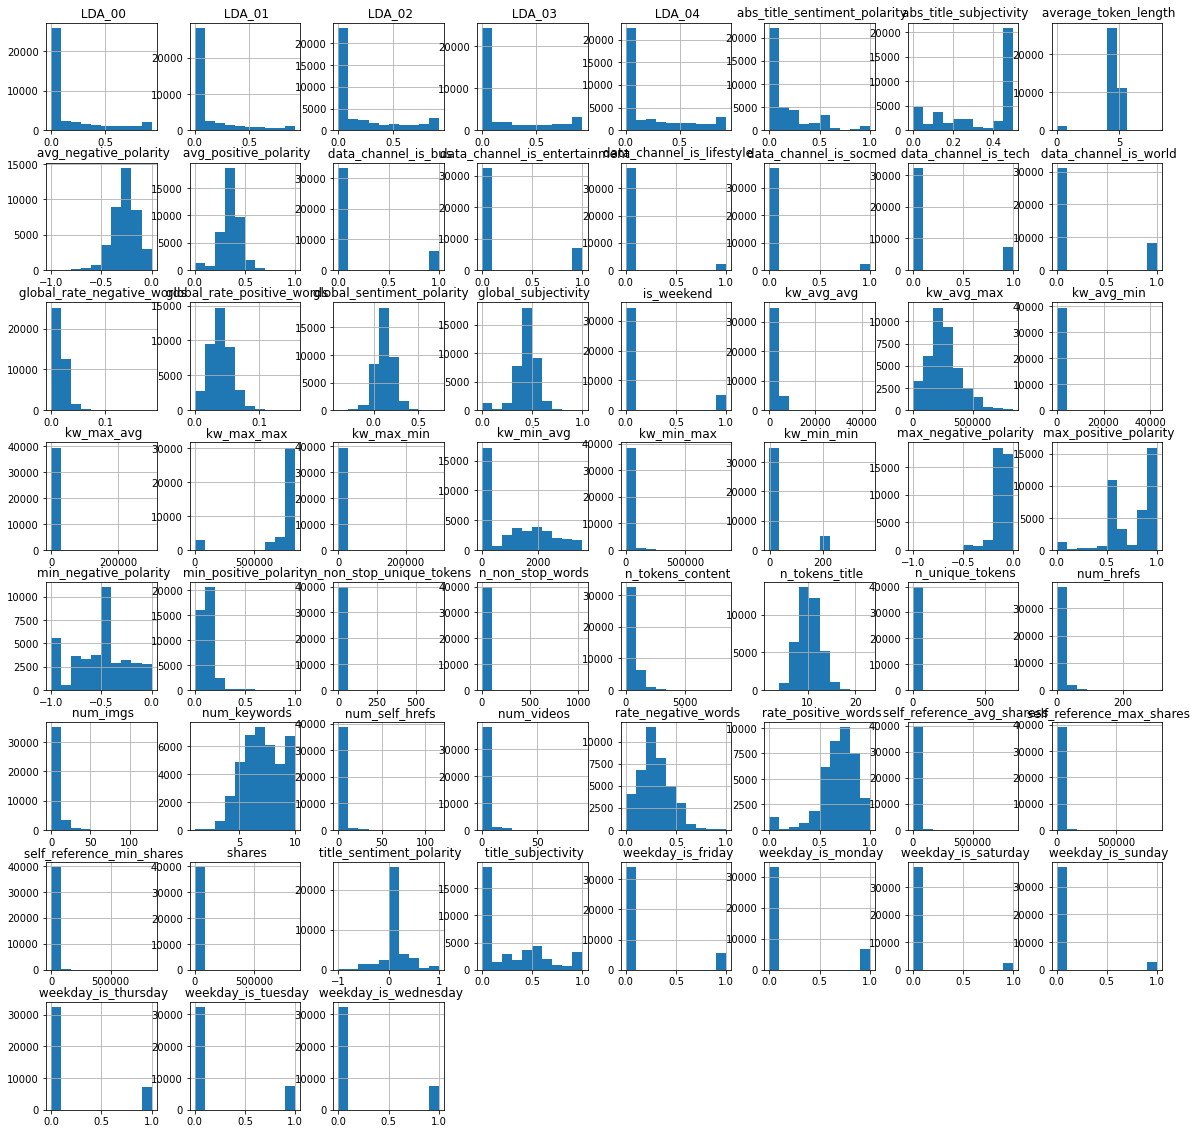

In [9]:
#Histogram for all attributes
df.hist(figsize=(20,20))
plt.show()

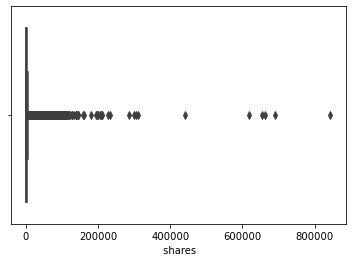

In [10]:
#Box plots
sns.boxplot(x=df[' shares'])
plt.show()


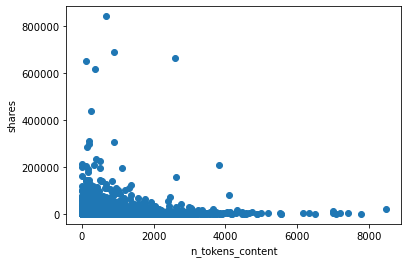

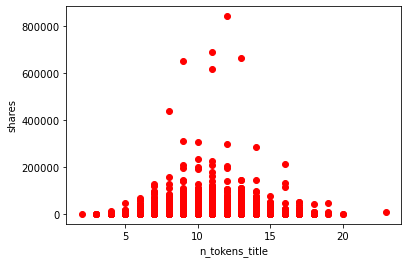

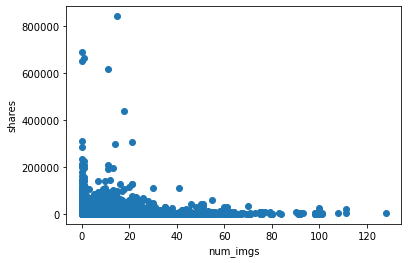

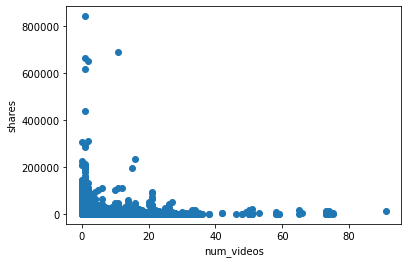

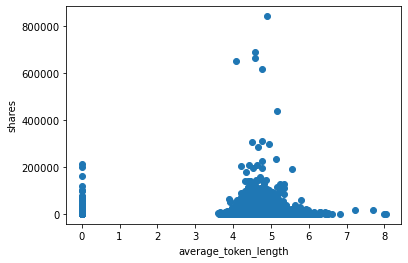

In [11]:
#Scatter plots of shares vs. number of words in content, title, no of imgs, videos, average length of words in article
plt.scatter(df[' n_tokens_content'], df[' shares'])
plt.xlabel('n_tokens_content')
plt.ylabel('shares')
plt.show()
plt.scatter(df[' n_tokens_title'], df[' shares'],color='r')
plt.xlabel('n_tokens_title')
plt.ylabel('shares')
plt.show()
plt.scatter(df[' num_imgs'], df[' shares'])
plt.xlabel('num_imgs')
plt.ylabel('shares')
plt.show()
plt.scatter(df[' num_videos'], df[' shares'])
plt.xlabel('num_videos')
plt.ylabel('shares')
plt.show()
plt.scatter(df[' average_token_length'], df[' shares'])
plt.xlabel('average_token_length')
plt.ylabel('shares')
plt.show()

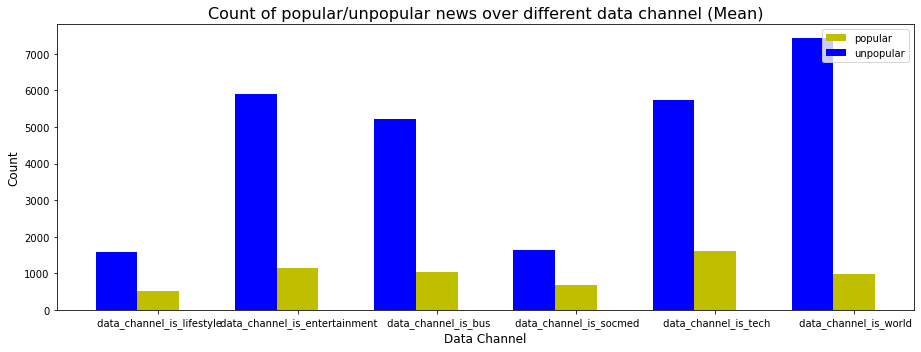

In [12]:
#Classifying news as popular for shares>1400 and unpopular for rest. 
#Find the no of popular and unpopular articles over different genres of news distributed over mean
a,b = df[' shares'].mean(),df[' shares'].median()
Dc = df.columns.values[11:17]
Unpop3=df[df[' shares']<a]
Pop3=df[df[' shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'y', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Data Channel", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()
#Tech news has most popular news
#World news seems to have most unpopular news

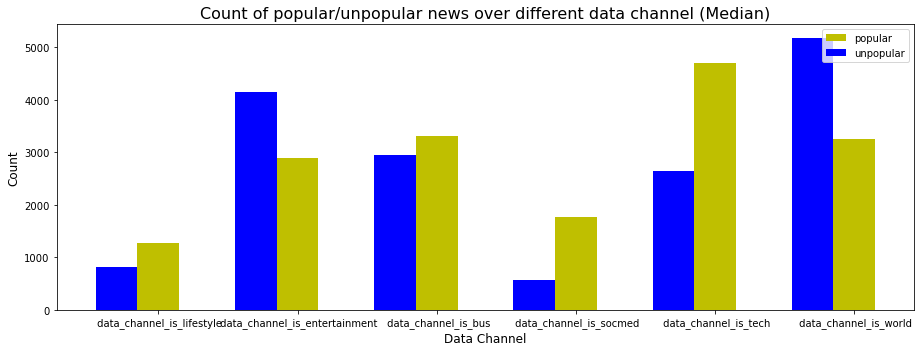

In [13]:
#Distributed over median
Dc = df.columns.values[11:17]
Unpop3=df[df[' shares']<b]
Pop3=df[df[' shares']>=b]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'y', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Data Channel", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()
#Same insight

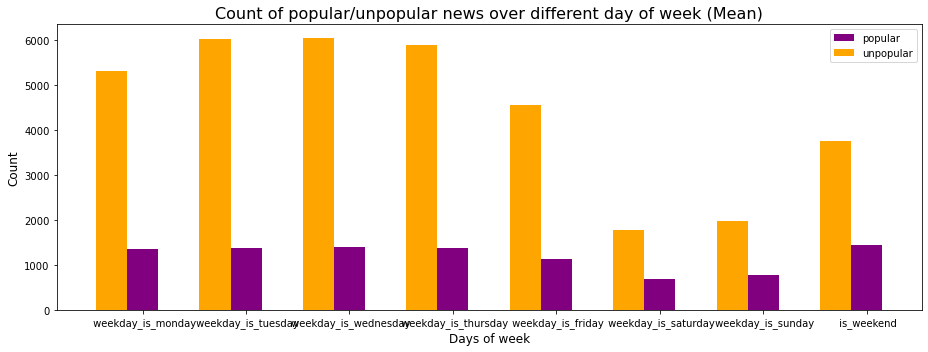

In [14]:
#Shares in different days of week
Wd=df.columns.values[29:37]
Unpop=df[df[' shares']<a]
Pop=df[df[' shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'purple', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'orange', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()
#most popular news in weekend
#unpopular on weekdays

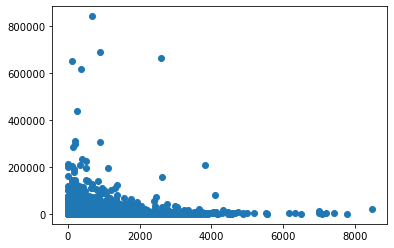

In [15]:
#Plot no. of words in content vs shares
plt.scatter(df[' n_tokens_content'], df[' shares'])
plt.show()

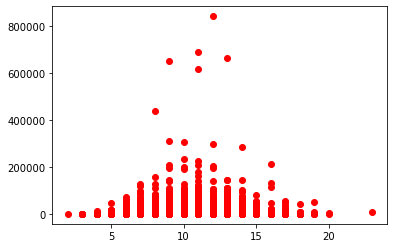

In [16]:
#Plot no. of words in title vs shares
plt.scatter(df[' n_tokens_title'], df[' shares'],color='r')
plt.show()

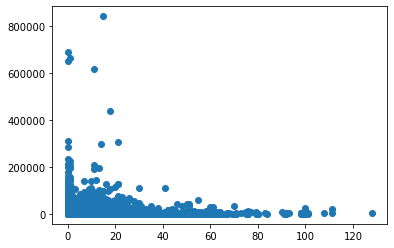

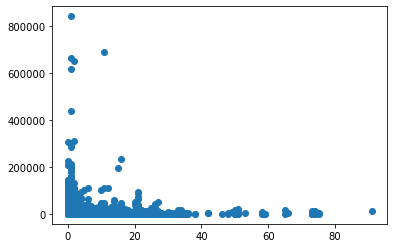

In [17]:
#no. of images and vids vs shares respectively
plt.scatter(df[' num_imgs'], df[' shares'])
plt.show()
plt.scatter(df[' num_videos'], df[' shares'])
plt.show()

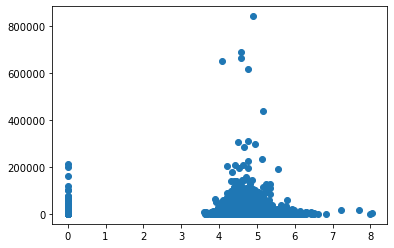

In [18]:
#avg length of words vs shares
plt.scatter(df[' average_token_length'], df[' shares'])
plt.show()

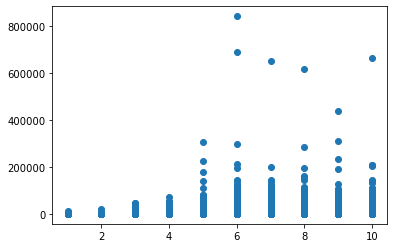

In [19]:
#no of keywords vs shares
plt.scatter(df[' num_keywords'], df[' shares'])
plt.show()

In [20]:
#Finding correlations


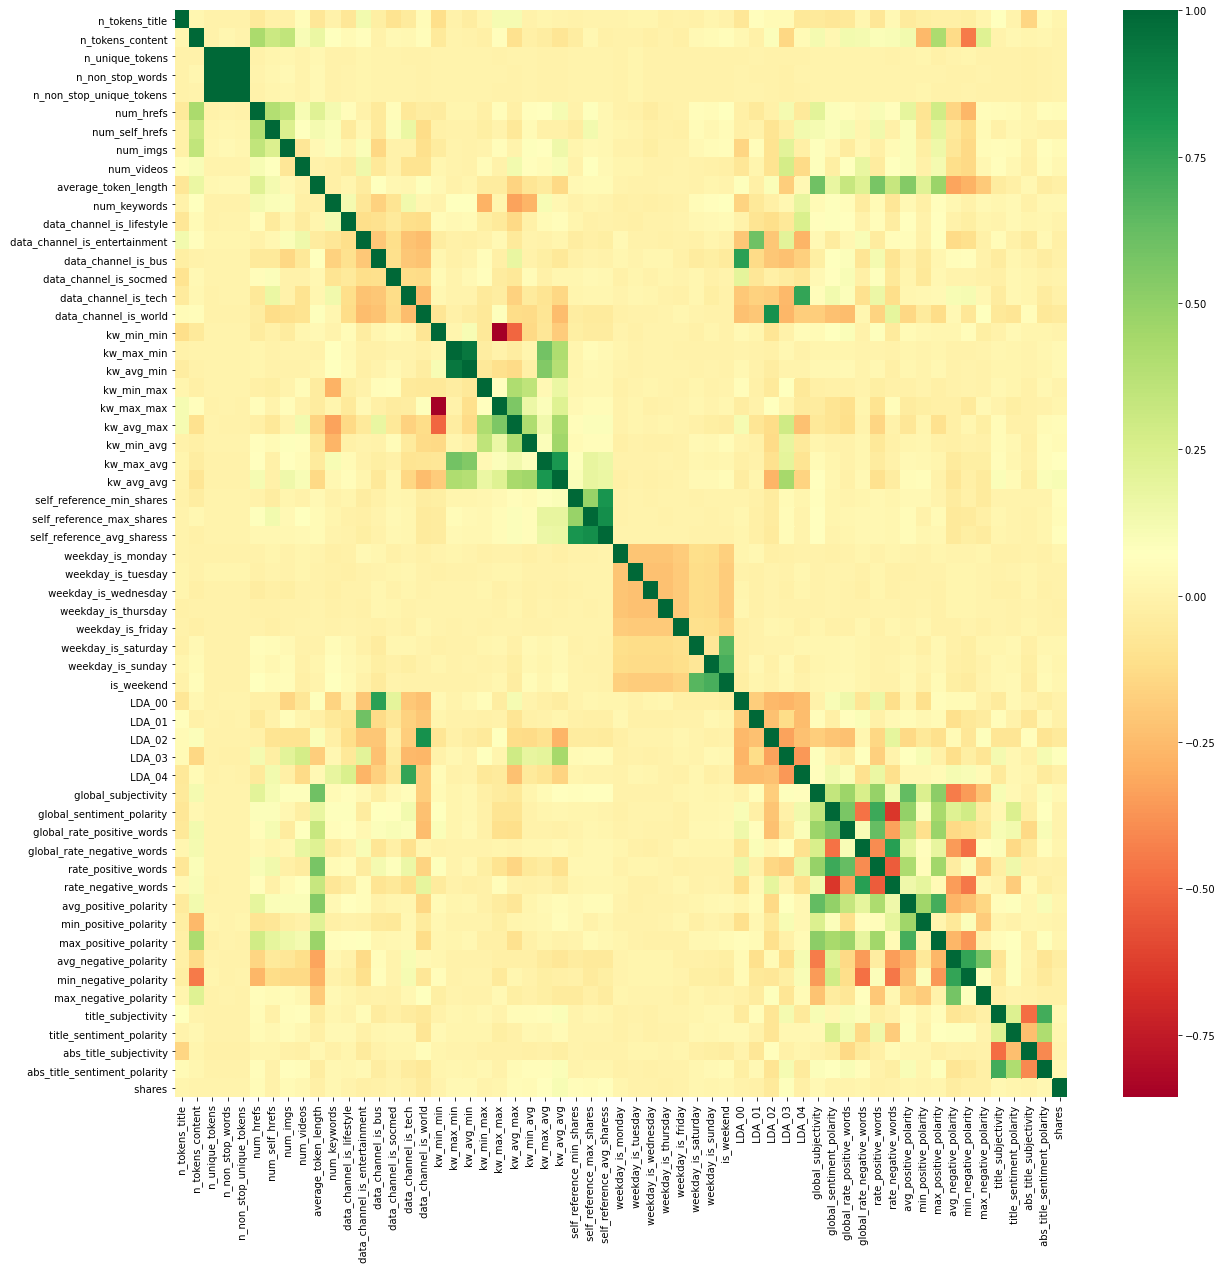

In [21]:
corr=df.corr()
plt.subplots(figsize=(20,20))
sb.heatmap(corr,cmap="RdYlGn")

In [22]:
#Correlation with target var: shares
df.drop(" shares", axis=1).apply(lambda x: x.corr(df[' shares']))

 n_tokens_title                   0.008783
 n_tokens_content                 0.002459
 n_unique_tokens                  0.000806
 n_non_stop_words                 0.000443
 n_non_stop_unique_tokens         0.000114
 num_hrefs                        0.045404
 num_self_hrefs                  -0.001900
 num_imgs                         0.039388
 num_videos                       0.023936
 average_token_length            -0.022007
 num_keywords                     0.021818
 data_channel_is_lifestyle        0.005831
 data_channel_is_entertainment   -0.017006
 data_channel_is_bus             -0.012376
 data_channel_is_socmed           0.005021
 data_channel_is_tech            -0.013253
 data_channel_is_world           -0.049497
 kw_min_min                      -0.001051
 kw_max_min                       0.030114
 kw_avg_min                       0.030406
 kw_min_max                       0.003901
 kw_max_max                       0.007863
 kw_avg_max                       0.044686
 kw_min_avg

# Feature selection

In [23]:
#KBest feature selection using f regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df.iloc[:,0:58]  #independent columns
y = df.iloc[:,-1] #target var
#best feature selection
bestfeatures = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attr','Score']  #naming the dataframe columns
print(featureScores.nlargest(35,'Score'))  #print 35 best features
feaset=featureScores.nlargest(35,'Score')['Attr']
kfeatures=list()
for f in feaset:
    kfeatures.append(f)



                              Attr       Score
25                      kw_avg_avg  489.239956
40                          LDA_03  280.160262
24                      kw_max_avg  164.610050
39                          LDA_02  139.243446
28      self_reference_avg_sharess  132.830299
26       self_reference_min_shares  124.518921
16           data_channel_is_world   97.360782
27       self_reference_max_shares   88.194845
5                        num_hrefs   81.891755
22                      kw_avg_max   79.316507
23                      kw_min_avg   62.107445
7                         num_imgs   61.595478
51           avg_negative_polarity   40.708546
42             global_subjectivity   39.634681
19                      kw_avg_min   36.682836
18                      kw_max_min   35.981945
57    abs_title_sentiment_polarity   29.210736
8                       num_videos   22.725326
9             average_token_length   19.208763
54              title_subjectivity   19.137892
10           

In [24]:
from sklearn.feature_selection import RFE
#RFE model for feature selection
X = df.iloc[:,0:58]  #independent columns
y = df.iloc[:,-1] #target var
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 40)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)
#Tried with rfe and obtained accuracy ~64% for best model
#Chose kbest as we obtained better accuracy

C:\Users\shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=40 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Index([' n_tokens_title', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subject

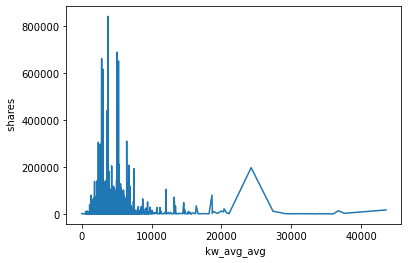

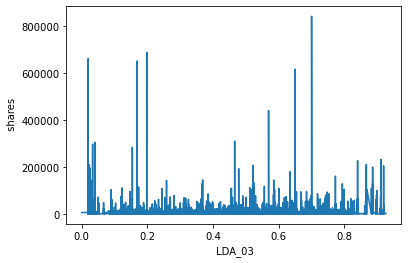

In [ ]:
sns.lineplot(x=' kw_avg_avg',y=' shares',data=df)
plt.show()

sns.lineplot(x=' LDA_03',y=' shares',data=df)
plt.show()
sns.lineplot(x=' kw_max_avg',y=' shares',data=df)
plt.show()
sns.lineplot(x=' LDA_02',y=' shares',data=df)
plt.show()

In [ ]:
#Selecting features obtained through kbest
#X=df[selected_features_rfe]
X = pd.DataFrame(df, columns=kfeatures)
X

In [ ]:
#Scaling using MinMaxScaler, which worked best for the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])


In [ ]:
#shares var is skewed
plt.hist(df[' shares'])
plt.show()
#Normalise the curve
plt.hist(np.log10(df[' shares']))
plt.show()

In [ ]:
#Setting output var as popular(2) or unpopular(1) after getting normalised values 
y_new=np.log10(df[' shares'])
print(y_new.describe())
df['cat']=(y_new<=3.146128)*1 | (y_new>3.146128)*2


In [ ]:
from sklearn import preprocessing
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
df1=scaled_df
y=df['cat'] #setting output var


In [ ]:
#Splitting data
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.70, test_size=0.3, random_state=15)


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg = LogisticRegression(max_iter=35000)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
#print('Train accuracy score:',accuracy_score(y_train,y_pred))
y_pred_test=logreg.predict(X_test)
print('Test accuracy score:', accuracy_score(y_test,y_pred_test))
conf=confusion_matrix(y_test,y_pred_test)
print(conf)
print(classification_report(y_test,y_pred_test))


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC(n_estimators=50, criterion='gini',max_depth=100,min_samples_split=2, min_samples_leaf=60, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=80, verbose=0, warm_start=False)
rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
#print('Train accuracy score:',accuracy_score(y_train,y_pred))
y_pred_test=rfc_b.predict(X_test)
print('Test accuracy score:', accuracy_score(y_test,y_pred_test))
conf=confusion_matrix(y_test,y_pred_test)
print(conf)
print(classification_report(y_test,y_pred_test))

In [ ]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Test accuracy:",metrics.accuracy_score(y_test, y_pred))
conf=confusion_matrix(y_test,y_pred)
print(conf)
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
rank_classifier.fit(X_train,y_train)
Predictions = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)
Testing_Accuarcy = accuracy_score(y_true = y_test, y_pred = Predictions)

print("Testing Accuracy",Testing_Accuarcy)
conf=confusion_matrix(y_test,Predictions)
print(conf)
print(classification_report(y_test,Predictions))

In [ ]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.075)
model = gb.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred))
conf=confusion_matrix(y_test,y_pred)
print(conf)
print(classification_report(y_test,y_pred))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
conf=confusion_matrix(y_test,y_pred)
print(conf)
print(classification_report(y_test,y_pred))

In [ ]:
#Integrating different models and using soft max voting
from sklearn import linear_model,discriminant_analysis
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
#log_reg = linear_model.LogisticRegression() #good
lda = discriminant_analysis.LinearDiscriminantAnalysis() #better
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.075)
rfc_b = RFC(n_estimators=50, criterion='gini',max_depth=100,min_samples_split=2, min_samples_leaf=60, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=80, verbose=0, warm_start=False)
model = VotingClassifier(estimators=[ ('abc', abc), ('gb', gb), ('rf', rfc_b),('lda',lda)], voting='soft', weights=[2.5,3,4,1])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
conf=confusion_matrix(y_test,y_pred)
print(conf)
print(classification_report(y_test,y_pred))

In [ ]:
y_score1 = model.predict_proba(X_test)[:,1]
roc_auc= roc_auc_score(y_test, y_score1)
print('roc_auc_score for Integrated model: ', roc_auc)


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_score1,pos_label=2)
roc_auc2 = auc(fpr1, tpr1)


In [ ]:
from sklearn.metrics import auc, roc_auc_score, roc_curve
plt.plot(fpr1, tpr1, label='ROC Curve 3 (AUC = %0.2f)' % (roc_auc2))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')    
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()
